In [1]:
import numpy as np
import math
import scipy.interpolate
from matplotlib import pyplot
import matplotlib
import seaborn as sns

In [2]:
k=1; mass=1; alpha=1; lamda = 1
nn=15; nstep=2**nn; tstep=0.001
velocity,position,energy=[],[],[]
pos=1; vel=0; force=0
eng = 1/2 *mass*vel**2 + 1/2 *k*pos**2 + (1/3) *lamda*pos**3 + (1/4)*alpha*pos**4
t = np.arange(0,nstep*tstep, tstep)

# start loop...
for i in range(nstep):
    # step 1 of leapfrog...
    vel+=tstep/2.*force/mass
    pos+=vel*tstep
    force=-k*pos  -pos**3*alpha -pos**2*lamda
    # step 2 of leapfrog...
    vel+=tstep/2.*force/mass
    eng = 1/2 *mass*vel**2 + (1/2)*k*pos**2 + (1/3) *lamda*pos**3 + (1/4)*alpha*pos**4
    
    # store the state for later processing...
    velocity.append(vel)
    position.append(pos)
    energy.append(eng)

# now fourier transform...
spectra=np.fft.fft(velocity)
omega=np.fft.fftfreq(nstep,d=tstep)*2*np.pi

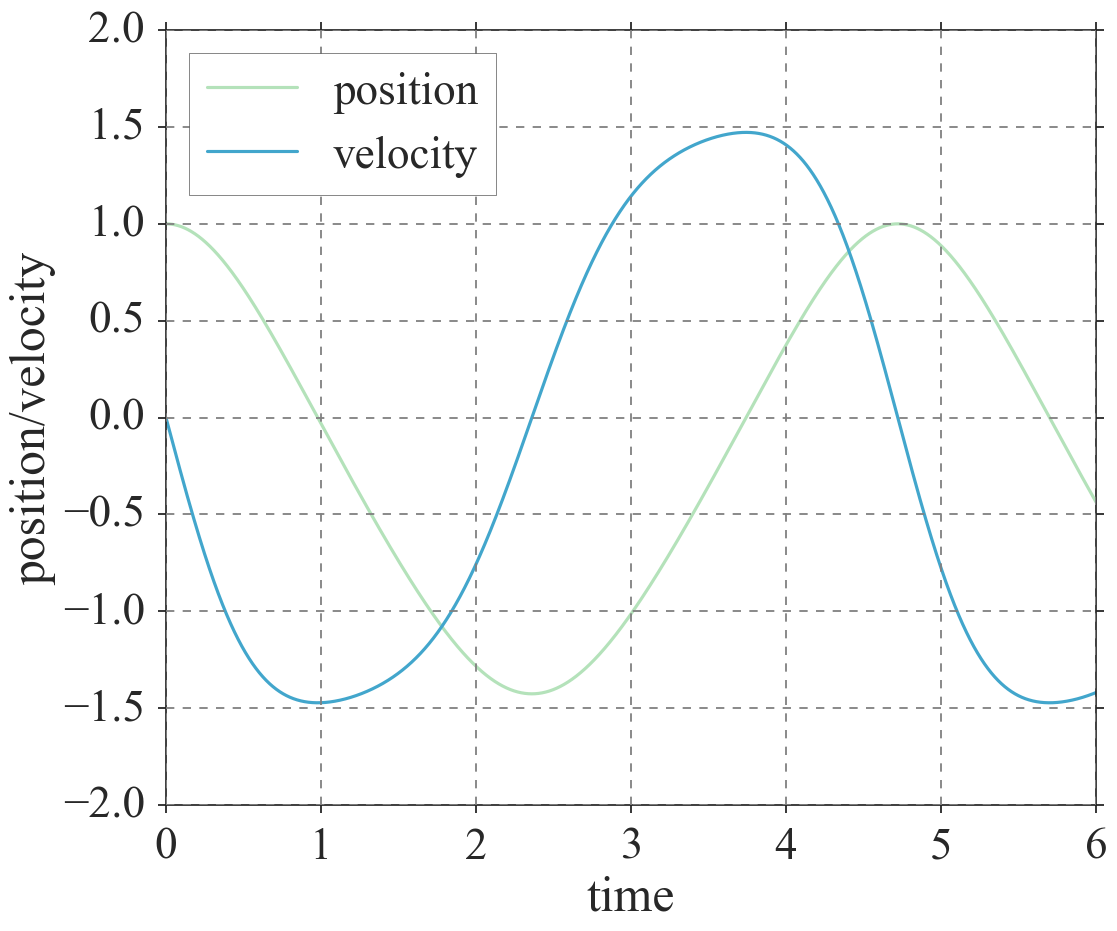

In [3]:
%matplotlib inline

sns.set_style("ticks", {'font.family': 'Times New Roman','axes.axisbelow': False,'grid.linestyle': u'--', 'grid.color': '.5', 'legend.frameon': True})

sns.set_palette(sns.color_palette('GnBu', n_colors=2))

x_start, x_end = 0,6
y_start, y_end = -2,2

pyplot.figure(1)
sns.set_context("talk", font_scale=2.5)
pyplot.figure(figsize=(12, 10))
pyplot.grid(True)
pyplot.ylabel('position/velocity')
pyplot.xlabel('time')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(t, position, linestyle='solid')
pyplot.plot(t, velocity, linestyle='solid')
pyplot.legend(['position', 'velocity'], loc='best');
pyplot.savefig('2c.pdf', dpi=300, bbox_inches='tight');

In [4]:
print(np.mean(position))

-0.266270839076


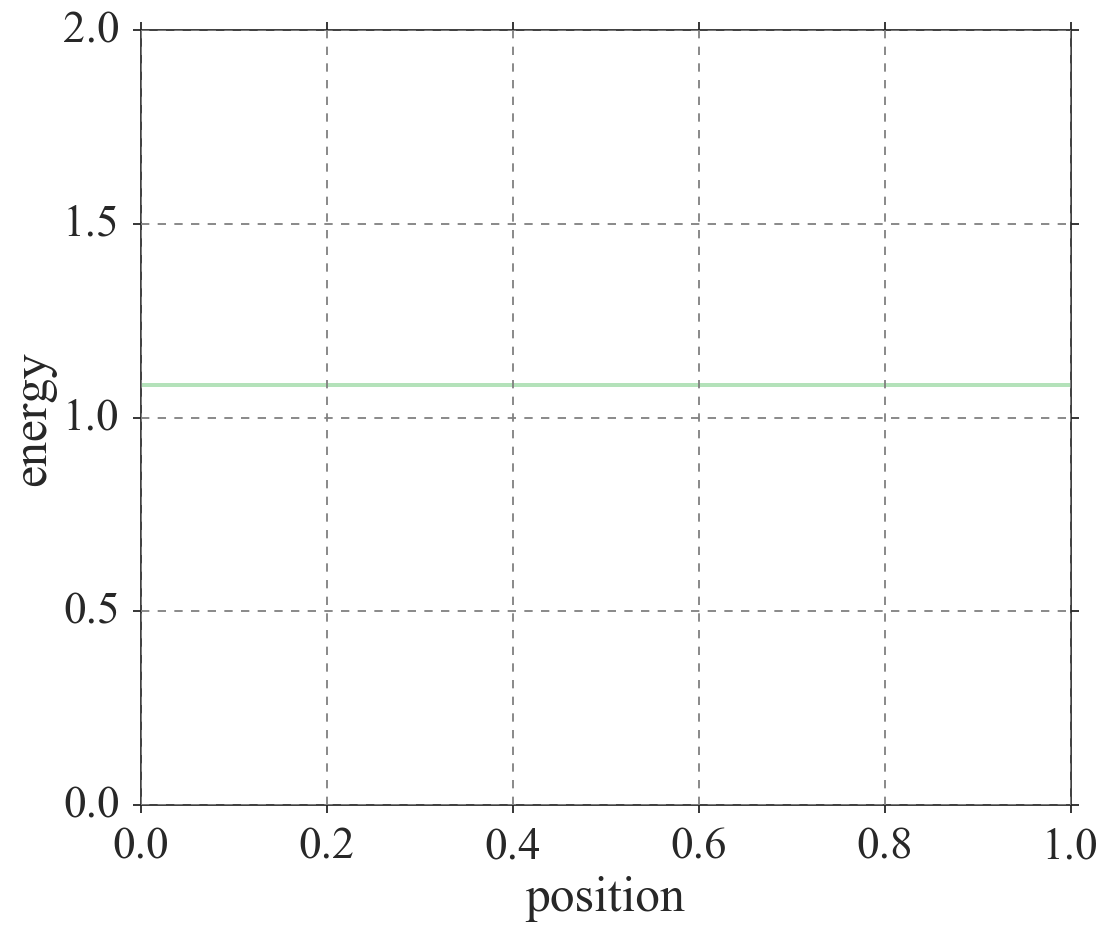

In [5]:
%matplotlib inline

sns.set_style("ticks", {'font.family': 'Times New Roman','axes.axisbelow': False,'grid.linestyle': u'--', 'grid.color': '.5', 'legend.frameon': True})

sns.set_palette(sns.color_palette('GnBu', n_colors=2))

x_start, x_end = 0,1
y_start, y_end = 0,2

pyplot.figure(1)
sns.set_context("talk", font_scale=2.5)
pyplot.figure(figsize=(12, 10))
pyplot.grid(True)
pyplot.ylabel('energy')
pyplot.xlabel('position')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(position, energy, linestyle='solid')
pyplot.savefig('2c2.pdf', dpi=300, bbox_inches='tight');